In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '2'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [3]:
# Generate random data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
kmeans.fit(X)

print(kmeans.cluster_centers_)

def change_centroids_to_medoids(kmeans, X):
    """
    This function must be executed after fitting kmeans. This moves the cluster_centers to the closest medoids.
    @param kmeans: sklearn kmeans model
    @param X: train data
    """
    # Get the closest medoids for each cluster center
    medoids = []
    X = np.asarray(X)
    for center in kmeans.cluster_centers_:
        distances = pairwise_distances(X, [center])
        medoid_index = np.argmin(distances)  
        medoids.append(X[medoid_index]) 

    medoids = np.array(medoids)

    # update the cluster centers to the closest medoids
    kmeans.cluster_centers_ = medoids
    
change_centroids_to_medoids(kmeans, X)

print(kmeans.cluster_centers_)

[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]
[[ 1.01618041  4.48527047]
 [ 1.86873582  0.95610376]
 [-1.36999388  7.76953035]
 [-1.56387985  2.8534991 ]]


In [5]:
# Prediction
labels = kmeans.predict(X)

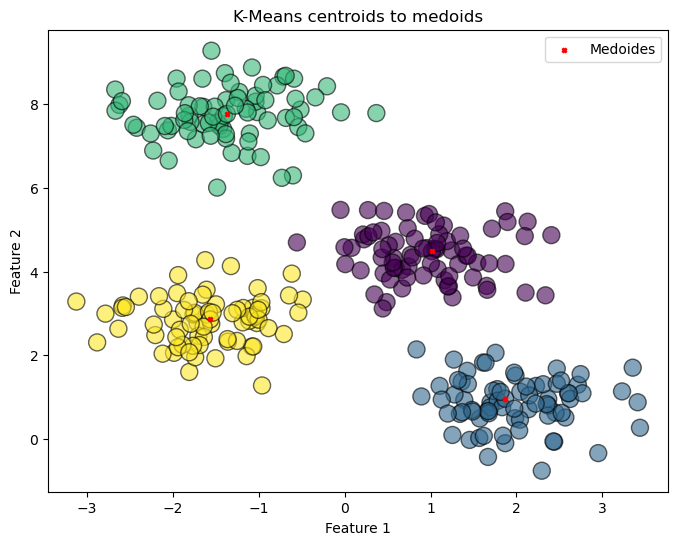

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=150, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=10, label='Medoides')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means centroids to medoids")
plt.legend()
plt.show()